In [1]:
# kp1 = 0
# sift = cv2.SIFT_create(500,8,0.02,8,1.6)
# kp1, des1 = sift.detectAndCompute(img1,None)
# kp2, des2 = sift.detectAndCompute(img2,None)
# im1 = img1
# im2 = img2
# im1=cv2.drawKeypoints(img1,kp1,im1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# im2=cv2.drawKeypoints(img2,kp2,im2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.imshow(im2)
# bf = cv2.BFMatcher()
# matches = bf.knnMatch(des1, des2, k=2)
# good = []
# for m, n in matches:
#     if m.distance < .5 * n.distance:
#         good.append([m])
# # cv.drawMatchesKnn expects list of lists as matches.
# img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# plt.imshow(img3), plt.show()
# len(good)

In [29]:
import Metashape
import sift_pose_est
doc = Metashape.Document()
project_path = "/home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx"
doc.open(project_path)
chunk = doc.chunk
cams = chunk.cameras
ll = chunk.transform.matrix*cams[0].transform
chunk.transform.matrix
chunk.crs.project([-5082296.495660925,3500298.0164774754, -1606680.5355770942]), ll
# l = chunk.crs.project(chunk.transform.matrix.mulp(cams[0].center))
# cam_pos = []
# for idx in range(len(cams)):
#     cam_pos.append(chunk.crs.project(chunk.transform.matrix.mulp(cams[idx].center)))
# #cam_pos[1599]
#chunk.crs.geoccs = Metashape.CoordinateSystem('EPSG::32755')

LoadProject: path = /home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx
loaded project in 0.000899 sec


Document.open(): The document is opened in read-only mode because it is already in use.


(Vector([145.4438946557849, -14.687532233542575, 0.9494514385841865]),
 Matrix([[-0.02597523724249146, -0.005603383743986022, 0.05559763064786649, -5082296.495660925],
        [-0.029821328830442747, -0.050459951901277146, -0.019018122771453184, 3500298.0164774754],
        [0.04725656345763574, -0.03492281113514624, 0.018558606236353442, -1606680.5355770942],
        [0.0, 0.0, 0.0, 1.0]]))

In [92]:
|import numpy as np
def find_rotation_matrix(A, B):
    """
    Returns the rotation matrix R such that R*A = B.
    """
    U, S, Vt = np.linalg.svd(np.dot(B.T, A))
    R = np.dot(U, Vt)
    if np.linalg.det(R) < 0:
        R[:, 2] *= -1
    return R
t1 = sift_pose_est.abs_relative_direction_from_transmat(np_cams[0], np_cams[1])
t2 = sift_pose_est.abs_relative_direction_from_transmat(np_cams_global[0], np_cams_global[1])
t1,t2, np_cams_global[0][:,3], np_cams[0][:,3]

(array([-0.26729645, -0.43983194,  0.85738   ]),
 array([-0.26729646, -0.43983193,  0.85738   ]),
 array([[-2.59752372e-02, -5.60338374e-03,  5.55976306e-02,
         -5.08229650e+06],
        [-2.98213288e-02, -5.04599519e-02, -1.90181228e-02,
          3.50029802e+06],
        [ 4.72565635e-02, -3.49228111e-02,  1.85586062e-02,
         -1.60668054e+06],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[-0.6513932 , -0.58034927, -0.48875518, 39.75346353],
        [-0.74991552,  0.59040702,  0.29840621, 73.73233388],
        [ 0.11538466,  0.56090487, -0.81980004,  6.61055763],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))

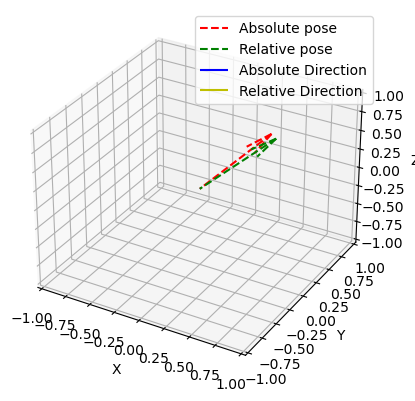

(array([[ 0.98423255,  0.11998233,  0.12996358],
        [-0.14300909,  0.97217987,  0.18551198],
        [-0.10408982, -0.2011729 ,  0.97400964]]),
 array([-1.40299122e-09, -3.23034933e-10, -1.92731547e-08]))

In [81]:
import numpy as np
def meta2np(cam):
    np_mat = []
    np_mat_global = []
    for idx in range(len(cam)):
        np_mat.append(np.asarray(cams[idx].transform).reshape(4,4))
        np_mat_global.append(np.asarray(chunk.transform.matrix*cams[idx].transform).reshape(4,4))
    return np.asarray(np_mat), np_mat_global
np_cams, np_cams_global = meta2np(cams)

grd = sift_pose_est.abs_relative_pose_from_transmat(np_cams[1205], np_cams[1207])
est = sift_pose_est.abs_relative_pose_from_transmat(np_cams_global[1205], np_cams_global[1207])
grd1 = find_rotation_matrix(np_cams[1205], np_cams[1207])
est1 = find_rotation_matrix(np_cams_global[1205], np_cams_global[1207])
sift_pose_est.visualize_diff(grd1[:3,:3],grd1[:3,3],est1[:3,:3],est1[:3,3],True)
grd,est1[:3,3]

In [3]:
import sift_pose_est
import numpy as np
import xml.etree.ElementTree as ET
def get_cam_intrinsics(root):
    camera_intrinsics = []
    y = []
    for node in root.iter("calibration"):
        x = list(node.attrib.values())
        if (x[1] == "adjusted"):
            for node2 in node.iter():
                camera_intrinsics.append(node2.text)
                y.append(list(node2.attrib.values()))
    camera_intrinsics = list(map(float, camera_intrinsics[2:]))
    width, height = list(map(float, y[1]))
    camera_intrinsics_dict = {"width": width,
                              "height": height,
                              "f": camera_intrinsics[0],
                              "cx": camera_intrinsics[1],
                              "cy": camera_intrinsics[2],
                              "b1": camera_intrinsics[3],
                              "b2": camera_intrinsics[4],
                              "k1": camera_intrinsics[5],
                              "k2": camera_intrinsics[6],
                              "k3": camera_intrinsics[7],
                              "k4": camera_intrinsics[8],
                              "p1": camera_intrinsics[9],
                              "p2": camera_intrinsics[10]}
    return camera_intrinsics_dict


def get_cam_pose(root):
    camera = []
    for cam in root.iter("camera"):
        camera_id = int(list(cam.attrib.values())[0])
        img_id = list(cam.attrib.values())[-1]
        # print(camera_id, img_id)
        for item in cam.iter("transform"):
            val = np.matrix(item.text)
            transform_mat = np.reshape(val, (4, 4))
            # print(transform_mat)
        for item in cam.iter("reference"):
            ref = item.attrib
            # print(ref)
        camera_dict = {"image_id": img_id,
                       "transform_mat": transform_mat,
                       "reference": ref}
        camera.append(camera_dict)
    camera_pose = camera
    pose = []
    for idx in range(len(camera_pose)):
        cam_ref = [0, 0, 0, 0, 0, 0]
        cam_id = camera_pose[idx]["image_id"]
        cam_pose = camera_pose[idx]["transform_mat"]
        cam_ref[0] = float(camera_pose[idx]["reference"]["x"]) - 145
        cam_ref[1] = float(camera_pose[idx]["reference"]["y"]) + 15
        cam_ref[2] = float(camera_pose[idx]["reference"]["z"]) - .07
        cam_ref[3] = float(camera_pose[idx]["reference"]["yaw"])
        cam_ref[4] = float(camera_pose[idx]["reference"]["pitch"])
        cam_ref[5] = float(camera_pose[idx]["reference"]["roll"])
        pose.append([cam_id, cam_pose, cam_ref])
    im_pose = np.asarray(pose)
    # file = open('image_id', 'wb')
    # pickle.dump(pose, file)
    # file.close()
    return im_pose


In [4]:
import sift_pose_est
import cv2
import matplotlib.pyplot as plt
file1 = "/home/turin/Desktop/lizard_dataset_curated/2014/cam14.xml"
file2 = "/home/turin/Desktop/lizard_dataset_curated/2015/cam15.xml"
tree1 = ET.parse(file1)
tree2 = ET.parse(file2)
root1 = tree1.getroot()
root2 = tree2.getroot()
camera_intrinsics1 = get_cam_intrinsics(root1)
camera_intrinsics2 = get_cam_intrinsics(root2)
# WE CALCULATE POSE ARRAY OF ALL CAMERA WITH  shape [Camera ID, Transformation Matrix, Geo Reference Vector]
pose1 = get_cam_pose(root1)
pose2 = get_cam_pose(root2)
calib_file = "/home/turin/Desktop/lizard_dataset_curated/opencv_cam_calib.xml"
K, D = sift_pose_est.get_camera_mat(calib_file)
img1 = cv2.imread("/home/turin/Desktop/lizard_island/jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/081_photos/PR_20141102_074956_734_LC16.png")
img2 = cv2.imread("/home/turin/Desktop/lizard_island/jackson/chronological/2015/r20151207_222558_lizard_d2_039_horseshoe_circle01/039_photos/PR_20151207_222610_712_LC16.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
sift_pose_est.estimate_relative_pose(img1, img2, K, D)
out = sift_pose_est.sift(img1, img2)
sift_pose_est.estimate_relative_pose(img1, img2, K, D)

/tmp/ipykernel_7485/97568792.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  im_pose = np.asarray(pose)


(array([[-0.10633314, -0.99355432,  0.03928201],
        [ 0.99270064, -0.10833706, -0.05299553],
        [ 0.05690963,  0.03336009,  0.99782183]]),
 array([[-0.07177727],
        [-0.13689021],
        [-0.98798233]]),
 True,
 48)

In [ ]:
import sys
sys.path.insert(0, '/home/turin/Documents/GitHub/long_term_underwater_vision/dataset')
import registration
x = registration.Params(max_iter = 5)
trans_15to14 = registration.main(x)
import open3d as o3d
##Check transformation
# pcd15
params = x
source = o3d.io.read_point_cloud(params.source_dir)
target = o3d.io.read_point_cloud(params.target_dir)
z = target.compute_point_cloud_distance(source)
source_transformed = source.transform(trans_15to14)
zz = target.compute_point_cloud_distance(source_transformed)
import numpy as np
z1 = np.asarray(z)
zz1 = np.asarray(zz)
z1.mean(), zz1.mean()

In [17]:
x = registration.Params(max_iter = 5)
params = x
source = o3d.io.read_point_cloud(params.source_dir)

In [158]:
import sift_pose_est
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
file1 = "/home/turin/Desktop/pcd_final/cam14final.xml"
#file2 = "/home/turin/Desktop/lizard_dataset_curated/2016/cam16.xml"
file2 = "/home/turin/Desktop/pcd_final/cam15final.xml"
tree1 = ET.parse(file1)
tree2 = ET.parse(file2)
root1 = tree1.getroot()
root2 = tree2.getroot()
camera_intrinsics1 = get_cam_intrinsics(root1)
camera_intrinsics2 = get_cam_intrinsics(root2)
# WE CALCULATE POSE ARRAY OF ALL CAMERA WITH  shape [Camera ID, Transformation Matrix, Geo Reference Vector]
pose1 = get_cam_pose(root1)
pose2 = get_cam_pose(root2)
import open3d as o3d
import sys
sys.path.insert(0, '/home/turin/Documents/GitHub/long_term_underwater_vision/dataset')
import registration
source_cam = o3d.io.read_point_cloud("/home/turin/Desktop/lizard_dataset_curated/2014/pcd14.pcd")

/tmp/ipykernel_10215/97568792.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  im_pose = np.asarray(pose)


In [159]:
def pose_to_xyzypr(pose):
    pose_xyzypr = []
    for idx in range(len(pose)):
        pose_xyzypr.append(pose[idx][2])
    return np.asarray(pose_xyzypr)
pose_ref = pose_to_xyz(pose1)
chunk = np.asarray([[-0.71521662316968926, -0.16685560185893789, 0.67869314868358444, 0.4706706262555],[-0.11675452287910915, -0.92891324311476264, -0.35140940248275276, 15-14.604471338103478], [0.68908168117358781, -0.33057434094966481, 0.64489304677339843, -.7+0.77338541377060244],[0,0,0,1]])
tr = chunk@pose1[0][1]
points = np.asarray(source_cam.points)
points[0].min(), points[0].max(),  tr

(-2.5486948490142822,
 65.8659896850586,
 matrix([[ 6.69325626e-01,  6.97245019e-01, -2.56617594e-01,
          -3.57777801e+01],
         [ 7.32112302e-01, -6.77785743e-01,  6.79563357e-02,
          -7.50598215e+01],
         [-1.26549530e-01, -2.33357815e-01, -9.64121023e-01,
           7.35585387e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00]]))

In [91]:
from scipy.spatial.transform import Rotation as R
yaw = pose_ref[0][3]#z
pitch = pose_ref[0][4]#y
roll =pose_ref[0][5]#x
r = R.from_euler('zxy', [yaw, -pitch, roll], degrees=True)
# rz = R.from_rotvec(pose_ref[0][3]*np.asarray([0,0,1]), degrees=True)
# ry = R.from_rotvec(pose_ref[0][4]*np.asarray([0,1,0]), degrees=True)
# rx = R.from_rotvec(pose_ref[0][5]*np.asarray([1,0,0]), degrees=True)
# r = rz*ry*rx
r.as_matrix()

array([[ 0.78053811, -0.58987946,  0.20688759],
       [ 0.61928478,  0.77475879, -0.12741737],
       [-0.08512709,  0.22757645,  0.97003213]])

In [97]:
import math
import numpy as np

# Define yaw, pitch, and roll angles in degrees
# yaw = 10.0
# pitch = 20.0
# roll = 30.0
yaw = pose_ref[0][3]#z
pitch = pose_ref[0][4]#y
roll =pose_ref[0][5]#x
print(yaw, pitch, roll)
# Convert angles to radians
yaw_rad = math.radians(yaw)
pitch_rad = math.radians(pitch)
roll_rad = math.radians(roll)

# Calculate cosine and sine values
cy = math.cos(yaw_rad)
sy = math.sin(yaw_rad)
cp = math.cos(pitch_rad)
sp = math.sin(pitch_rad)
cr = math.cos(roll_rad)
sr = math.sin(roll_rad)

# Build rotation matrices
R_yaw = np.array([[cy, -sy, 0],
                  [sy, cy, 0],
                  [0, 0, 1]])

R_pitch = np.array([[cp, 0, sp],
                    [0, 1, 0],
                    [-sp, 0, cp]])

R_roll = np.array([[1, 0, 0],
                   [0, cr, -sr],
                   [0, sr, cr]])

# Compute final rotation matrix
R = np.dot(R_yaw, np.dot(R_pitch, R_roll))
R

38.63625025 -7.320377354 12.03960372


array([[ 0.77475879, -0.63140051,  0.03289706],
       [ 0.61928478,  0.74734926, -0.24073937],
       [ 0.12741737,  0.20688759,  0.97003213]])

In [122]:
def pose_to_xyz(pose):
    pose1xyz = pose[:,1]
    pose1x = []
    pose1y = []
    pose1z = []
    for idx in range(len(pose1xyz)):
        pose1x.append(pose1xyz[idx][0,3])
        pose1y.append(pose1xyz[idx][1,3])
        pose1z.append(pose1xyz[idx][2,3])
    return np.asarray([pose1x, pose1y, pose1z])

In [129]:
xyz14 = pose_to_xyzypr(pose1)
xyz15 = pose_to_xyzypr(pose2)
xyz14 = xyz14[:,:3]
xyz15 = xyz15[:,:3]
xyz14.shape

(1600, 3)

In [134]:
#xyz14 = xyz14.T
#xyz15 = xyz15.T
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz14)
pcd.estimate_normals(o3d.geometry.KDTreeSearchParamHybrid(radius = 0.1, max_nn = 30))
o3d.io.write_point_cloud("cam14.ply", pcd)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz15)
pcd.estimate_normals(o3d.geometry.KDTreeSearchParamHybrid(radius = 0.1, max_nn = 30))
o3d.io.write_point_cloud("cam15.ply", pcd)

True

In [293]:
source_cam = o3d.io.read_point_cloud("/home/turin/Desktop/pcd_final/pcd14final.pcd")
o3d.visualization.draw_geometries([pcd])

# target_cam = o3d.io.read_point_cloud("cam14.ply")
# # source_cam.transform(np.asarray([[2.7,0,0,0],[0,3.5,0,0],[0,0,1,0],[0,0,0,1]]))
# # target_cam.transform(np.asarray([[1,0,0,0],[0,1,0,0],[0,0,.05,0],[0,0,0,1]]))
# source_cam.get_axis_aligned_bounding_box(), target_cam.get_axis_aligned_bounding_box()

TypeError: draw_geometries(): incompatible function arguments. The following argument types are supported:
    1. (geometry_list: List[open3d.cuda.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False) -> None
    2. (geometry_list: List[open3d.cuda.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False, lookat: numpy.ndarray[numpy.float64[3, 1]], up: numpy.ndarray[numpy.float64[3, 1]], front: numpy.ndarray[numpy.float64[3, 1]], zoom: float) -> None

Invoked with: [<PointCloud '39712554 points'>]

In [42]:
points = np.asarray(source_cam.points)
points.min(), points.max()

(0.0030830276664346457, 0.5865015387535095)

In [23]:
#target_cam = o3d.io.read_point_cloud("cam14.ply")
points = np.asarray(source_cam.points)
normals = np.asarray(source_cam.normals)
colors = np.asarray(source_cam.colors)
points_sub = points
for idx in range(len(points)):
    points_sub[idx][0] = points[idx][0] - 332400
    points_sub[idx][1] = points[idx][1] - 8375600
    points_sub[idx][2] = points[idx][2] - 10
pcd14est = o3d.geometry.PointCloud()
pcd14est.points = o3d.utility.Vector3dVector(points_sub)
pcd14est.colors = o3d.utility.Vector3dVector(colors)
pcd14est.estimate_normals(o3d.geometry.KDTreeSearchParamHybrid(radius = 0.1, max_nn = 30))
o3d.io.write_point_cloud("pcd14est.pcd", pcd14est)


True

In [32]:
points_sub.min(), points_sub.max(), points.min(), points.max()

(-13.189565181732178, 66.5, -13.189565181732178, 66.5)

In [278]:
source_cam = o3d.io.read_point_cloud("pcd14local.ply")
o3d.visualization.draw_geometries([source_cam])


In [281]:
aa = np.asarray(source_cam.points)
aa[0].min(), aa[0].max()

(-2.548696279525757, 4.254013538360596)

In [9]:
def preprocess_point_cloud(pcd, voxel_size):
    #print(":: Downsample with a voxel size %.3f." % voxel_size)
    #pcd_down = pcd.voxel_down_sample(voxel_size)

    #radius_normal = voxel_size * 2
    #print(":: Estimate normal with search radius %.3f." % radius_normal)
    #pcd_down.estimate_normals(
        #o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=30))

    radius_feature = voxel_size * 3
    #print(":: Compute FPFH feature with search radius %.3f." % radius_feature)
    pcd_fpfh = o3d.pipelines.registration.compute_fpfh_feature(
        pcd,
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_feature, max_nn=100))
    return pcd, pcd_fpfh
def prepare_dataset(source, target, voxel_size):
    print(":: Load two point clouds with initial pose.")
    source_down, source_fpfh = preprocess_point_cloud(source, voxel_size)
    target_down, target_fpfh = preprocess_point_cloud(target, voxel_size)
    return source_down, target_down, source_fpfh, target_fpfh


In [18]:
x = registration.Params(target_dir="cam15.ply", max_iter = 5, voxel_size=.5, max_corr_dist=5)
cam_15to14 = registration.main(x)

Global and Local Registration
:: Load two point clouds with initial pose.
:: Downsample with a voxel size 0.500.
:: Estimate normal with search radius 1.000.
:: Compute FPFH feature with search radius 1.500.
:: Downsample with a voxel size 0.500.
:: Estimate normal with search radius 1.000.
:: Compute FPFH feature with search radius 1.500.
:: Apply global registration with distance threshold 4.250


RuntimeError: [1;31m[Open3D Error] (void open3d::t::pipelines::kernel::DecodeAndSolve6x6(const open3d::core::Tensor&, open3d::core::Tensor&, float&, int&)) /root/Open3D/cpp/open3d/t/pipelines/kernel/TransformationConverter.cpp:146: Singular 6x6 linear system detected, tracking failed.
[0;m

In [ ]:
xyz14[0].min(), xyz15[0].min(),xyz14[0].max(), xyz15[0].max()

In [ ]:
bound = source.get_axis_aligned_bounding_box()

In [ ]:
bound

In [ ]:
target_bound = target.get_axis_aligned_bounding_box()
target_bound

In [108]:
import camera
camera14 = camera.main("/home/turin/Documents/GitHub/long_term_underwater_vision/dataset_file/2014/cam14.xml", "/home/turin/Documents/GitHub/long_term_underwater_vision/dataset_file/opencv_cam_calib.xml")
camera15 = camera.main("/home/turin/Documents/GitHub/long_term_underwater_vision/dataset_file/2015/cam15.xml", "/home/turin/Documents/GitHub/long_term_underwater_vision/dataset_file/opencv_cam_calib.xml")

In [109]:
xyz14 = []
xyz15 = []
for idx in range(len(camera14)):
    xyz = np.subtract(camera14[idx][1][:3,3],np.asarray([[332400],
                                             [8375600],
                                             [0]]))
    xyz = [float(x) for x in xyz]
    xyz14.append(xyz)
for idx in range(len(camera15)):
    xyz = np.subtract(camera15[idx][1][:3,3],np.asarray([[332400],
                                             [8375600],
                                             [0]]))
    xyz = [float(x) for x in xyz]
    xyz15.append(xyz)
xyz14 = np.asarray(xyz14)
xyz15 = np.asarray(xyz15)

array([56.86287464, 56.8612202 , 56.89291279, ..., 60.37052375,
       60.33963368, 60.35086253])

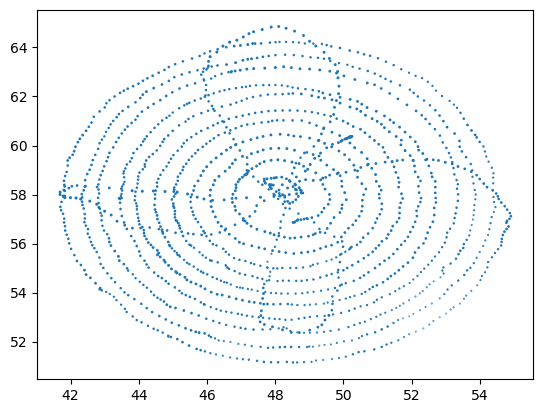

In [110]:
import matplotlib.pyplot as plt
plt.scatter(xyz14[:,0], xyz14[:,1], xyz14[:,2])
#plt.scatter(xyz15[:,0], xyz15[:,1], xyz15[:,2])

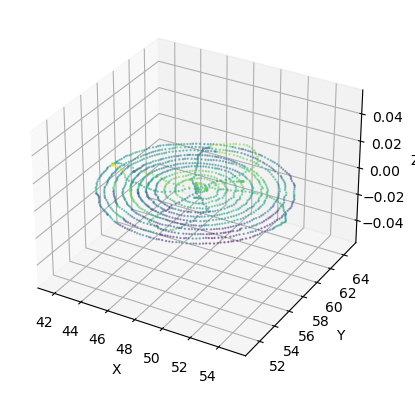

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

# Generate some random data
np.random.seed(42)
x = xyz14[:,0]
y = xyz14[:,1]
z = xyz14[:,2]
# Create the figure and the 3D axes
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the scatter plot
ax.scatter(x, y, np.zeros(x.shape), c=z, cmap='viridis', s=.5, alpha=0.5)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Save the figure in high resolution
plt.savefig('result/3d_scatter_plot14.png', dpi=1200)
# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
def plot(x,y,z):
    # Create the figure and the 3D axes
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Create the scatter plot
    ax.scatter(x, y, z, c=z, cmap='viridis', s=.5, alpha=0.9)

    # Set the axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Save the figure in high resolution
    plt.savefig('3d_scatter_plot14.png', dpi=1200)
    # Show the plot
    plt.show()

In [18]:
float(zz[0])

332448.51671448187

In [44]:
import numpy as np
import xml.etree.ElementTree as ET
root = ET.parse("/home/turin/Documents/GitHub/long_term_underwater_vision/dataset_file/2014/cam14.xml").getroot()
camera = []
for cam in root.iter("camera"):
    camera_id = int(list(cam.attrib.values())[0])
    img_id = list(cam.attrib.values())[-1]
    # print(camera_id, img_id)
    for item in cam.iter("transform"):
        val = np.matrix(item.text)
        transform_mat = np.reshape(val, (4, 4))
        # print(transform_mat)
    for item in cam.iter("reference"):
        ref = []
        for idx in item.attrib.values():
            if idx!="true":
                ref.append(float(idx))
        ref = np.asarray(ref)
    camera_dict = {"image_id": img_id,
                   "transform_mat": transform_mat,
                   "reference": ref}
    camera.append(camera_dict)

In [107]:
import os
if os.path.exists(os.getcwd()+"/result"):
    print(10)
else:
    os.mkdir("result")

10
